<a href="https://colab.research.google.com/github/ismail-memon-123/CS_5262_ML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Task 1: Linear Regression with One Variable

In [ ]:
#Load data from txt file
food_data = np.array([
[6.1101,17.592],
[5.5277,9.1302],
[8.5186,13.662],
[7.0032,11.854],
[5.8598,6.8233],
[8.3829,11.886],
[7.4764,4.3483],
[8.5781,12],
[6.4862,6.5987],
[5.0546,3.8166],
[5.7107,3.2522],
[14.164,15.505],
[5.734,3.1551],
[8.4084,7.2258],
[5.6407,0.71618],
[5.3794,3.5129],
[6.3654,5.3048],
[5.1301,0.56077],
[6.4296,3.6518],
[7.0708,5.3893],
[6.1891,3.1386],
[20.27,21.767],
[5.4901,4.263],
[6.3261,5.1875],
[5.5649,3.0825],
[18.945,22.638],
[12.828,13.501],
[10.957,7.0467],
[13.176,14.692],
[22.203,24.147],
[5.2524,-1.22],
[6.5894,5.9966],
[9.2482,12.134],
[5.8918,1.8495],
[8.2111,6.5426],
[7.9334,4.5623],
[8.0959,4.1164],
[5.6063,3.3928],
[12.836,10.117],
[6.3534,5.4974],
[5.4069,0.55657],
[6.8825,3.9115],
[11.708,5.3854],
[5.7737,2.4406],
[7.8247,6.7318],
[7.0931,1.0463],
[5.0702,5.1337],
[5.8014,1.844],
[11.7,8.0043],
[5.5416,1.0179],
[7.5402,6.7504],
[5.3077,1.8396],
[7.4239,4.2885],
[7.6031,4.9981],
[6.3328,1.4233],
[6.3589,-1.4211],
[6.2742,2.4756],
[5.6397,4.6042],
[9.3102,3.9624],
[9.4536,5.4141],
[8.8254,5.1694],
[5.1793,-0.74279],
[21.279,17.929],
[14.908,12.054],
[18.959,17.054],
[7.2182,4.8852],
[8.2951,5.7442],
[10.236,7.7754],
[5.4994,1.0173],
[20.341,20.992],
[10.136,6.6799],
[7.3345,4.0259],
[6.0062,1.2784],
[7.2259,3.3411],
[5.0269,-2.6807],
[6.5479,0.29678],
[7.5386,3.8845],
[5.0365,5.7014],
[10.274,6.7526],
[5.1077,2.0576],
[5.7292,0.47953],
[5.1884,0.20421],
[6.3557,0.67861],
[9.7687,7.5435],
[6.5159,5.3436],
[8.5172,4.2415],
[9.1802,6.7981],
[6.002,0.92695],
[5.5204,0.152],
[5.0594,2.8214],
[5.7077,1.8451],
[7.6366,4.2959],
[5.8707,7.2029],
[5.3054,1.9869],
[8.2934,0.14454],
[13.394,9.0551],
[5.4369,0.61705],
])

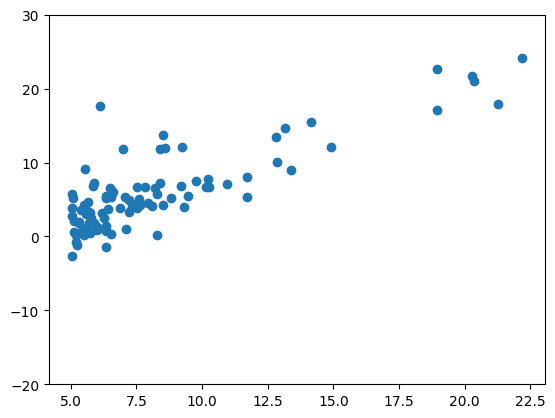

In [ ]:
# Plot the data food_data
plt.scatter(food_data[:,0], food_data[:,1])
ax = plt.gca()
ax.set_ylim([-20, 30])
plt.show()

In [ ]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)

        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [ ]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005

    returns:
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''

    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    print(thetas[0])
    print(thetas[1])

    return thetas, total_error

In [ ]:
def normalize_data(training_data):
    ''' Normalize the training data by scaling features to have zero mean and unit variance '''
    X = np.array([ex[0] for ex in training_data])  # extract x values
    mean_X = np.mean(X)
    std_X = np.std(X)
    normalized_X = (X - mean_X) / std_X
    return [(normalized_X[i], training_data[i][1]) for i in range(len(training_data))]

In [ ]:
# set initial parameters
thetas = [0, 0.01]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 75
error_traj = [0] * total_epochs
#had to normalize data because otherwise it was bouncing too much (the thetas and would go from -infin to infin probably because of the negative values in the data)
training_data_normalized = normalize_data(food_data)

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(training_data_normalized, thetas, alpha)
    print(thetas)
    # store a history of errors
    error_traj[epoch] = epoch_error


2.8319805000000002
2.2327749496809934
[np.float64(2.8319805000000002), np.float64(2.2327749496809934)]
4.2904504575
3.3775040487667054
[np.float64(4.2904504575), np.float64(3.3775040487667054)]
5.041562485612499
3.9670395347958465
[np.float64(5.041562485612499), np.float64(3.9670395347958465)]
5.428385180090436
4.270650310100854
[np.float64(5.428385180090436), np.float64(4.270650310100854)]
5.627598867746574
4.427009859382933
[np.float64(5.627598867746574), np.float64(4.427009859382933)]
5.730193916889485
4.507535027263203
[np.float64(5.730193916889485), np.float64(4.507535027263203)]
5.7830303671980845
4.5490054887215425
[np.float64(5.7830303671980845), np.float64(4.5490054887215425)]
5.810241139107013
4.570362776372588
[np.float64(5.810241139107013), np.float64(4.570362776372588)]
5.824254686640111
4.581361779512876
[np.float64(5.824254686640111), np.float64(4.581361779512876)]
5.831471663619657
4.587026266130124
[np.float64(5.831471663619657), np.float64(4.587026266130124)]
5.835188

(-10.0, 30.0)

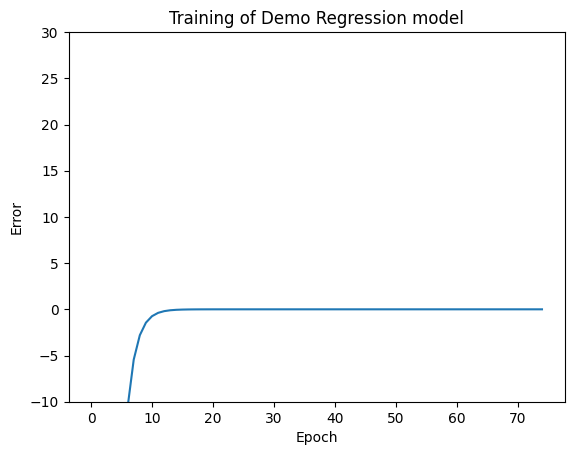

In [ ]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');
ax = plt.gca()
ax.set_ylim([-10, 30])

-3.8957808783118546
1.1930336441895937


Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

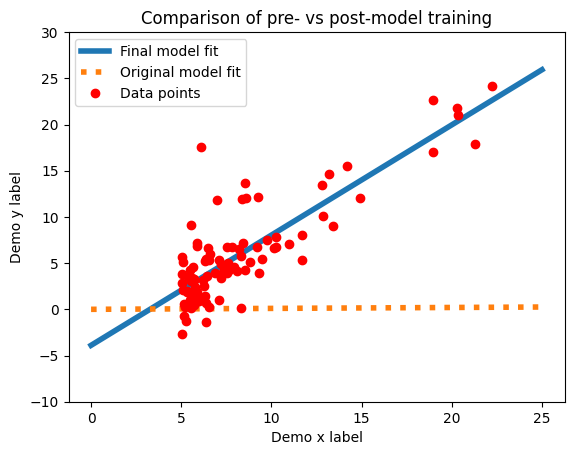

In [ ]:


lin_pts = np.linspace(0, 25, 100) # gives you 100 values between [0, 25]

#Denormalize thetas
X = np.array([ex[0] for ex in food_data])  # extract x values
mean_X = np.mean(X)
std_X = np.std(X)
theta_1 = thetas[1] / std_X
theta_0 = thetas[0] - theta_1 * mean_X

mdl_pts = theta_0 + lin_pts * theta_1
print(theta_0)
print(theta_1)
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()
ax = plt.gca()
ax.set_ylim([-10, 30])

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(food_data[:,0], food_data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training')


Model Definition and Summary: This model used a one variable linear regression, where the x1 variable (the input feature) was the population of the city and we were trying to predict the profit of the truck. The need is to compute theta 0 and theta 1 the intercept and slope of the linear line we are fitting through the data.

#Multi Variable Regression

In [ ]:
# Load data from text file
housing_data = np.array([
    [2104,3,399900],
[1600,3,329900],
[2400,3,369000],
[1416,2,232000],
[3000,4,539900],
[1985,4,299900],
[1534,3,314900],
[1427,3,198999],
[1380,3,212000],
[1494,3,242500],
[1940,4,239999],
[2000,3,347000],
[1890,3,329999],
[4478,5,699900],
[1268,3,259900],
[2300,4,449900],
[1320,2,299900],
[1236,3,199900],
[2609,4,499998],
[3031,4,599000],
[1767,3,252900],
[1888,2,255000],
[1604,3,242900],
[1962,4,259900],
[3890,3,573900],
[1100,3,249900],
[1458,3,464500],
[2526,3,469000],
[2200,3,475000],
[2637,3,299900],
[1839,2,349900],
[1000,1,169900],
[2040,4,314900],
[3137,3,579900],
[1811,4,285900],
[1437,3,249900],
[1239,3,229900],
[2132,4,345000],
[4215,4,549000],
[2162,4,287000],
[1664,2,368500],
[2238,3,329900],
[2567,4,314000],
[1200,3,299000],
[852,2,179900],
[1852,4,299900],
[1203,3,239500]
])

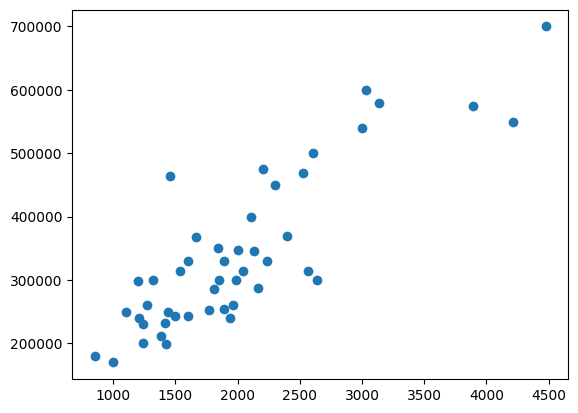

In [ ]:
# Plot the data food_data
plt.scatter(housing_data[:,0], housing_data[:,2])
plt.show()

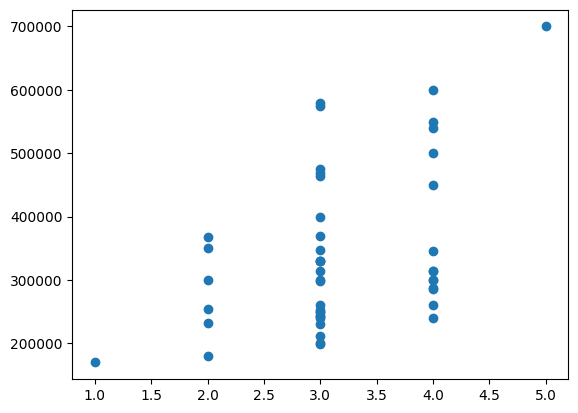

In [ ]:
# Plot the data food_data
plt.scatter(housing_data[:,1], housing_data[:,2])
plt.show()

In [ ]:
def calculate_single_forward_2(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)

        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]
    theta_2 = thetas[2]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    x2 = train_ex[1]
    y = train_ex[2]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1 + theta_2 * x2
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1, error * x2])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [ ]:
def gradient_descent_2(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005

    returns:
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''

    total_error = 0
    overall_gradients = np.zeros(3)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward_2(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1, theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]
    print(thetas[0])
    print(thetas[1])
    print(thetas[2])

    return thetas, total_error

In [ ]:
def normalize_data_2(training_data):
    ''' Normalize the training data by scaling features to have zero mean and unit variance '''
    X = np.array([ex[0] for ex in training_data])  # extract x values
    mean_X = np.mean(X)
    std_X = np.std(X)
    normalized_X = (X - mean_X) / std_X
    X_2 = np.array([ex[1] for ex in training_data])  # extract x values
    mean_X_2 = np.mean(X_2)
    std_X_2 = np.std(X_2)
    normalized_X_2 = (X_2 - mean_X_2) / std_X_2
    return [(normalized_X[i], normalized_X_2[i], training_data[i][1]) for i in range(len(training_data))]

In [ ]:
# set initial parameters
thetas = [0, 0.01, 0.1]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 75
error_traj = [0] * total_epochs
#had to normalize data because otherwise it was bouncing too much (the thetas and would go from -infin to infin probably because of the negative values in the data)
training_data_normalized_2 = normalize_data_2(housing_data)

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_2(training_data_normalized_2, thetas, alpha)
    print(thetas)
    # store a history of errors
    error_traj[epoch] = epoch_error


0.7449999999999999
0.09355908222565779
0.25210213719934776
[np.float64(0.7449999999999999), np.float64(0.09355908222565779), np.float64(0.25210213719934776)]
1.3149250000000001
0.13746631112107732
0.3574645409241807
[np.float64(1.3149250000000001), np.float64(0.13746631112107732), np.float64(0.3574645409241807)]
1.750917625
0.15719046092189015
0.4322889268432033
[np.float64(1.750917625), np.float64(0.15719046092189015), np.float64(0.4322889268432033)]
2.084451983125
0.16243312300266172
0.4869340359711091
[np.float64(2.084451983125), np.float64(0.16243312300266172), np.float64(0.4869340359711091)]
2.339605767090625
0.15925288428201725
0.5280476505292226
[np.float64(2.339605767090625), np.float64(0.15925288428201725), np.float64(0.5280476505292226)]
2.534798411824328
0.15140976684670762
0.5599180605717781
[np.float64(2.534798411824328), np.float64(0.15140976684670762), np.float64(0.5599180605717781)]
2.684120785045611
0.14121588167172838
0.5853310180620656
[np.float64(2.684120785045611),

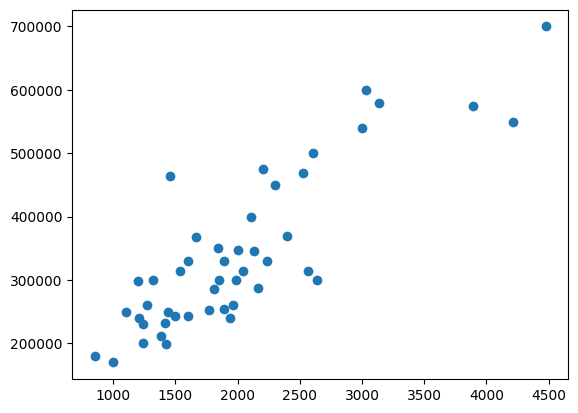

0.0001537194532166275
1.1734677898802872e-07


(-10.0, 30.0)

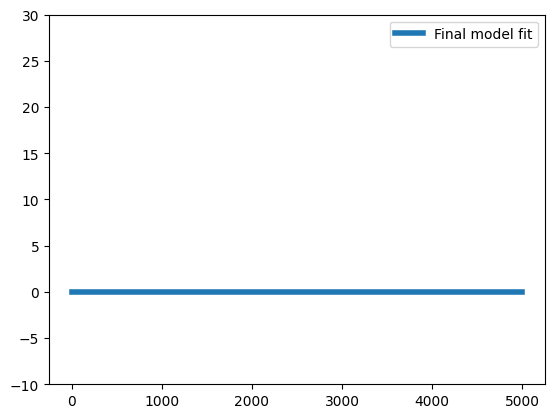

In [ ]:
# Plot the data food_data
plt.scatter(housing_data[:,0], housing_data[:,2])
plt.show()

lin_pts = np.linspace(0, 5000, 100) # gives you 100 values between [0, 25]

''' Normalize the training data by scaling features to have zero mean and unit variance '''
X_1 = np.array([ex[0] for ex in housing_data])  # extract x values
mean_X = np.mean(X_1)
std_X = np.std(X_1)
X_2 = np.array([ex[1] for ex in housing_data])  # extract x values
mean_X_2 = np.mean(X_2)
std_X_2 = np.std(X_2)


#Denormalize thetas from normalize_theta_2
theta_1 = thetas[1] / std_X
theta_2 = thetas[2] / std_X_2
theta_0 = thetas[0] - (theta_1 * mean_X) - (theta_2 * mean_X_2)

mdl_pts = theta_0 + lin_pts * theta_1
print(theta_0)
print(theta_1)
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()
ax = plt.gca()
ax.set_ylim([-10, 30])



(-10.0, 30.0)

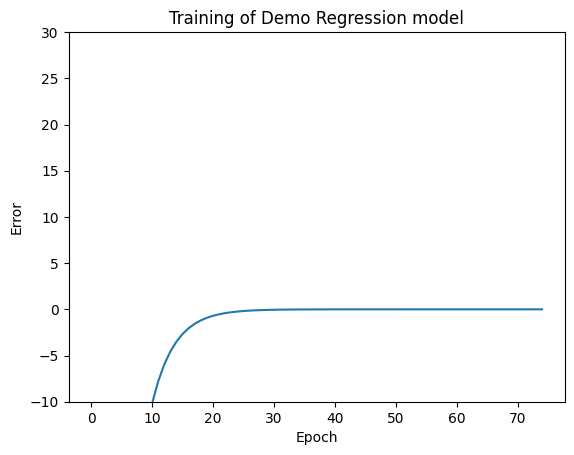

In [ ]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');
ax = plt.gca()
ax.set_ylim([-10, 30])

This multi variable regression had the square footage and the number of bedrooms as inputs and the output is the price. The weights of the thetas 0 and thetas 1 and 2 (the intercept, coeff of the square footage, and the coefficient of the number of bedrooms needed to be computed).

#Assignment 9

In this assingment, we will create a fully connected, 2 layer neural network. Will be using numpy.

In [ ]:
# Initialize parameters.
# Final dataset is 32x32 color images, so 32x32x3
input_size = 32*32*3
print(input_size)
hidden_size = 100
output_size = 10
num_samples = 200

3072


In [ ]:
# Initialize toy data
def init_toy_data(input_size, output_size, num_samples):
  np.random.seed(1)
  # 100 total data points with size input_size
  X = np.random.randn(num_samples, input_size)
  # y is one hot encoding so one of the output_size values will be 1, rest will be 0.
  # Random integer labels from 0 to output_size - 1
  y_indices = np.random.randint(0, output_size, size=num_samples)
  # One-hot encode the labels
  y = np.zeros((num_samples, output_size))
  y[np.arange(num_samples), y_indices] = 1
  return X, y

In [ ]:
def get_params():
  params = {}
  np.random.seed(1)
  params['W1'] = 0.01 * np.random.randn(input_size, hidden_size)
  params['b1'] = np.zeros((1, hidden_size))
  params['W2'] = 0.01 * np.random.randn(hidden_size, output_size)
  params['b2'] = np.zeros((1, output_size))
  return params


In [ ]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # for numerical stability
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

# Cross-entropy loss
def compute_loss(probs, y_true):
    N = y_true.shape[0]
    log_probs = -np.log(probs + 1e-9)
    loss = np.sum(log_probs * y_true) / N
    return loss

# Forward + Backward + Parameter Update, one epoch since it uses entire dataset
def train_one_step(X, y, params, learning_rate):
    # Forward pass
    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, params['W2']) + params['b2']
    probs = softmax(Z2)
    loss = compute_loss(probs, y)

    # Backward pass
    N = X.shape[0]
    dZ2 = (probs - y) / N  # gradient
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, params['W2'].T)
    dZ1 = dA1 * (Z1 > 0)  # ReLU backprop
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Parameter update
    params['W1'] -= learning_rate * dW1
    params['b1'] -= learning_rate * db1
    params['W2'] -= learning_rate * dW2
    params['b2'] -= learning_rate * db2

    return loss, params

In [ ]:
X,y = init_toy_data(input_size, output_size, num_samples)
print("X shape:", X.shape)
print("y (one-hot) shape:", y.shape)
# this is fine bec the dot product is mat mult so 200x3072 for X and 3072x100 for W1 works perfectly. Bec that makes final matrix of 200x100 bec 100 is hidden size
# and 200 is num samples.
params = get_params()


X shape: (200, 3072)
y (one-hot) shape: (200, 10)


In [ ]:
# Train for 100 epochs
for i in range(100):
    loss, params = train_one_step(X, y, params, learning_rate=1e-4)
    print(f"Step {i+1}, Loss: {loss:.4f}")

Step 1, Loss: 2.3051
Step 2, Loss: 2.3051
Step 3, Loss: 2.3050
Step 4, Loss: 2.3050
Step 5, Loss: 2.3050
Step 6, Loss: 2.3050
Step 7, Loss: 2.3050
Step 8, Loss: 2.3050
Step 9, Loss: 2.3050
Step 10, Loss: 2.3049
Step 11, Loss: 2.3049
Step 12, Loss: 2.3049
Step 13, Loss: 2.3049
Step 14, Loss: 2.3049
Step 15, Loss: 2.3049
Step 16, Loss: 2.3049
Step 17, Loss: 2.3049
Step 18, Loss: 2.3048
Step 19, Loss: 2.3048
Step 20, Loss: 2.3048
Step 21, Loss: 2.3048
Step 22, Loss: 2.3048
Step 23, Loss: 2.3048
Step 24, Loss: 2.3048
Step 25, Loss: 2.3047
Step 26, Loss: 2.3047
Step 27, Loss: 2.3047
Step 28, Loss: 2.3047
Step 29, Loss: 2.3047
Step 30, Loss: 2.3047
Step 31, Loss: 2.3047
Step 32, Loss: 2.3046
Step 33, Loss: 2.3046
Step 34, Loss: 2.3046
Step 35, Loss: 2.3046
Step 36, Loss: 2.3046
Step 37, Loss: 2.3046
Step 38, Loss: 2.3046
Step 39, Loss: 2.3046
Step 40, Loss: 2.3045
Step 41, Loss: 2.3045
Step 42, Loss: 2.3045
Step 43, Loss: 2.3045
Step 44, Loss: 2.3045
Step 45, Loss: 2.3045
Step 46, Loss: 2.30

##Real Dataset

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
import pickle
import numpy as np
import os

def load_CIFAR_batch(filename):
    """Load a single batch of CIFAR-10."""
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']  # shape: (10000, 3072)
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(cifar10_dir):
    """Load all batches of CIFAR-10."""
    X_train = []
    y_train = []

    # Load all training batches
    for i in range(1, 6):
        f = os.path.join(cifar10_dir, f'data_batch_{i}')
        X, Y = load_CIFAR_batch(f)
        X_train.append(X)
        y_train.append(Y)

    X_train = np.concatenate(X_train)  # shape: (50000, 3, 32, 32)
    y_train = np.concatenate(y_train)  # shape: (50000,)

    # Load test batch
    X_test, y_test = load_CIFAR_batch(os.path.join(cifar10_dir, 'test_batch'))

    return X_train, y_train, X_test, y_test


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
def load_cifar10():
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
  print(trainset.shape())

In [ ]:
# Loads CIFAR-10 and splits into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# Mask so we use subset instead of all the data.
# Subsample the data
num_training=49000
num_validation=1000
num_test=1000


mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000, 1)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 1)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000, 1)


In [ ]:
# Reshape into rows
X_train = X_train.reshape(X_train.shape[0], -1)  # (50000, 3072)
X_val = X_val.reshape(X_val.shape[0], -1)      # (10000, 3072)
X_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 3072)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 3072)
(1000, 3072)
(1000, 3072)


In [ ]:
# ONe hot encoding for the y values
def one_hot(y, num_classes=10):
    y = y.ravel()  # because y is already 2d array
    one_hot_y = np.zeros((y.shape[0], num_classes))
    print(one_hot_y.shape)
    one_hot_y[np.arange(y.shape[0]), y] = 1
    return one_hot_y

print(y_train)
print(y_train.shape)
y_train_hot = one_hot(y_train)
print(y_train_hot[0:3])

# Dont need one hot for test and val
#y_test_hot = one_hot(y_test)
#y_val_hot = one_hot(y_val)
#print(y_val_hot.shape)

[[6]
 [9]
 [9]
 ...
 [4]
 [9]
 [3]]
(49000, 1)
(49000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


##Train Network

In [ ]:
# Predict function takes in params and calculates expected output
def predict(X, params):
    # Forward pass
    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, params['W2']) + params['b2']
    probs = softmax(Z2)

    # Choose the class with highest probability
    y_pred = np.argmax(probs, axis=1)
    print(y_pred.shape)
    return y_pred

In [ ]:

# Initialize parameters.
# Final dataset is 32x32 color images, so 32x32x3
input_size = 32*32*3
hidden_size = 100
output_size = 10
num_samples = 200

# Go in batches of 200
params = get_params()

#Subsection 200 of the x train and x test dataset
X = X_train[:200]
y = y_train_hot[:200]
error_traj = []

# Train for 100 epochs
for i in range(100):
    loss, params = train_one_step(X, y, params, learning_rate=1e-4)
    print(f"Step {i+1}, Loss: {loss:.4f}")
    error_traj.append(loss)

val_acc = (predict(X_val, params) == y_val).mean()
print('Validation accuracy: ', val_acc)

Step 1, Loss: 2.3020
Step 2, Loss: 2.3020
Step 3, Loss: 2.3020
Step 4, Loss: 2.3020
Step 5, Loss: 2.3020
Step 6, Loss: 2.3020
Step 7, Loss: 2.3020
Step 8, Loss: 2.3020
Step 9, Loss: 2.3020
Step 10, Loss: 2.3020
Step 11, Loss: 2.3020
Step 12, Loss: 2.3019
Step 13, Loss: 2.3019
Step 14, Loss: 2.3019
Step 15, Loss: 2.3019
Step 16, Loss: 2.3019
Step 17, Loss: 2.3019
Step 18, Loss: 2.3019
Step 19, Loss: 2.3019
Step 20, Loss: 2.3019
Step 21, Loss: 2.3019
Step 22, Loss: 2.3019
Step 23, Loss: 2.3019
Step 24, Loss: 2.3019
Step 25, Loss: 2.3019
Step 26, Loss: 2.3019
Step 27, Loss: 2.3019
Step 28, Loss: 2.3019
Step 29, Loss: 2.3019
Step 30, Loss: 2.3019
Step 31, Loss: 2.3019
Step 32, Loss: 2.3019
Step 33, Loss: 2.3019
Step 34, Loss: 2.3019
Step 35, Loss: 2.3018
Step 36, Loss: 2.3018
Step 37, Loss: 2.3018
Step 38, Loss: 2.3018
Step 39, Loss: 2.3018
Step 40, Loss: 2.3018
Step 41, Loss: 2.3018
Step 42, Loss: 2.3018
Step 43, Loss: 2.3018
Step 44, Loss: 2.3018
Step 45, Loss: 2.3018
Step 46, Loss: 2.30

(2.0, 2.5)

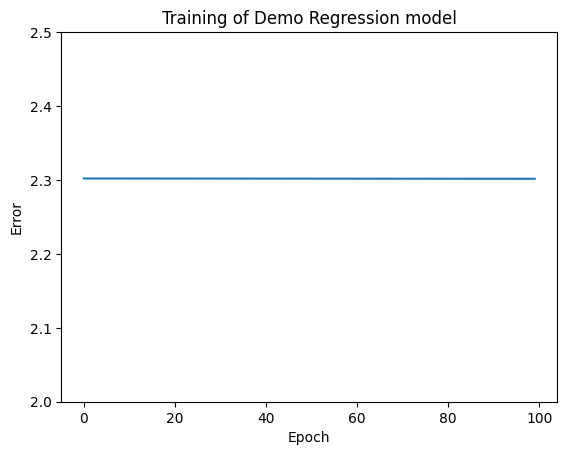

In [ ]:
# Plot the loss vs epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');
ax = plt.gca()
ax.set_ylim([2, 2.5])

##Tuning HyperParameters

In [ ]:
# # Try with more and more training data
# # Go in batches of 200
# params_tuning = get_params()

# for size in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000]:
#   #Subsection 200 of the x train and x test dataset
#   X = X_train[:size]
#   y = y_train_hot[:size]

#   # Train for 100 epochs
#   for i in range(100):
#       loss, params_tuning = train_one_step(X, y, params_tuning, learning_rate=1e-4)
#       #print(f"Step {i+1}, Loss: {loss:.4f}")

#   val_acc = (predict(X_val, params) == y_val).mean()
#   print('Validation accuracy: ', val_acc)

In [ ]:
# # Will now experiment with different learning rates and number of epochs
# params_tuning = get_params()

# for learning_rate in [1e-4, 1e-3, 1e-2, 1e-1, 2e-1, 5e-1]:
#   for epochs in [100, 200, 500, 1000, 5000]:
#     #Subsection 500 of the x train and x test dataset
#     X = X_train[:500]
#     y = y_train_hot[:500]

#     # Train for 100 epochs
#     for i in range(epochs):
#         loss, params_tuning = train_one_step(X, y, params_tuning, learning_rate)
#         #print(f"Step {i+1}, Loss: {loss:.4f}")

#     val_acc = (predict(X_val, params) == y_val).mean()
#     print("LR: ", learning_rate)
#     print("Epochs: ", epochs)
#     print('Validation accuracy: ', val_acc)

In [ ]:
test_acc = (predict(X_test, params_tuning) == y_test).mean()
print('Test accuracy: ', test_acc)

NameError: name 'params_tuning' is not defined

Conclusion: I tried adjusting the learning rate, the number of epochs, and the sie of the training data to try to acheive better results and better accuracy of the training model.

#Assignment Week 10

This is the homework assignment for week 10.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from torch.optim import SGD

In [ ]:
class bmodel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(bmodel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer
        self.relu = nn.ReLU()                          # Activation
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)  # No softmax, CrossEntropyLoss handles that
        return x

Now load the data from CIFAR 10

In [ ]:
import pickle
import numpy as np
import os

def load_CIFAR_batch(filename):
    """Load a single batch of CIFAR-10."""
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']  # shape: (10000, 3072)
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(cifar10_dir):
    """Load all batches of CIFAR-10."""
    X_train = []
    y_train = []

    # Load all training batches
    for i in range(1, 6):
        f = os.path.join(cifar10_dir, f'data_batch_{i}')
        X, Y = load_CIFAR_batch(f)
        X_train.append(X)
        y_train.append(Y)

    X_train = np.concatenate(X_train)  # shape: (50000, 3, 32, 32)
    y_train = np.concatenate(y_train)  # shape: (50000,)

    # Load test batch
    X_test, y_test = load_CIFAR_batch(os.path.join(cifar10_dir, 'test_batch'))

    return X_train, y_train, X_test, y_test


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
def load_cifar10():
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
  print(trainset.shape())

In [ ]:
# Loads CIFAR-10 and splits into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# Mask so we use subset instead of all the data.
# Subsample the data
num_training=49000
num_validation=1000
num_test=1000


mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000, 1)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 1)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000, 1)


In [ ]:
# Reshape into rows
X_train = X_train.reshape(X_train.shape[0], -1)  # (50000, 3072)
X_val = X_val.reshape(X_val.shape[0], -1)      # (10000, 3072)
X_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 3072)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 3072)
(1000, 3072)
(1000, 3072)


In [ ]:
# ONe hot encoding for the y values
def one_hot(y, num_classes=10):
    y = y.ravel()  # because y is already 2d array
    one_hot_y = np.zeros((y.shape[0], num_classes))
    print(one_hot_y.shape)
    one_hot_y[np.arange(y.shape[0]), y] = 1
    return one_hot_y

print(y_train)
print(y_train.shape)
y_train_hot = one_hot(y_train)
print(y_train_hot[0:3])

# Dont need one hot for test and val
#y_test_hot = one_hot(y_test)
#y_val_hot = one_hot(y_val)
#print(y_val_hot.shape)

[[6]
 [9]
 [9]
 ...
 [4]
 [9]
 [3]]
(49000, 1)
(49000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Run the data on the toy model

In [ ]:
# Initialize toy data
def init_toy_data(input_size, output_size, num_samples):
  np.random.seed(1)
  # 100 total data points with size input_size
  X = np.random.randn(num_samples, input_size)
  # y is one hot encoding so one of the output_size values will be 1, rest will be 0.
  # Random integer labels from 0 to output_size - 1
  y_indices = np.random.randint(0, output_size, size=num_samples)
  # One-hot encode the labels
  y = np.zeros((num_samples, output_size))
  y[np.arange(num_samples), y_indices] = 1
  return X, y

In [ ]:
toy_inputs, toy_labels = init_toy_data(3072, 10, 200)
toy_inputs = torch.tensor(toy_inputs, dtype=torch.float32)
toy_labels = torch.tensor(toy_labels, dtype=torch.float32)
print(toy_inputs.shape)
print(toy_labels.shape)


model = bmodel(3072, 100, 10)

optimizer = SGD(model.parameters(), lr=0.05)
criterion = nn.BCEWithLogitsLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(100):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(toy_inputs)):

        input_i = toy_inputs[iteration]  # xi
        label_i = toy_labels[iteration]  # yi

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 0.5):
        print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


    print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)

torch.Size([200, 3072])
torch.Size([200, 10])
Total loss: 143.20686250925064
Total loss: 82.18035587668419
Total loss: 56.03039302676916
Total loss: 10.791595297399908
Total loss: 2.5405353823443875
Total loss: 1.5107515235431492
Total loss: 1.14580329565797
Total loss: 0.9282627636566758
Total loss: 0.7809898832347244
Total loss: 0.6738205289584585
Total loss: 0.5919980796170421
Total loss: 0.5273620639345609
Epoch #12


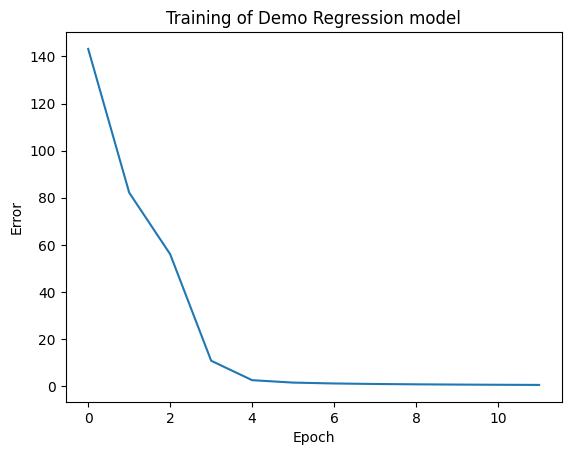

In [ ]:
# Plot the loss vs epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

Now use the CIFAR real data.

In [ ]:
learning_rate = 0.05
#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
X = X_train[:500]
Y = y_train[:500]

print(Y)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel(3072, 100, 10)

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(100):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 0.5):
        print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


    print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]
 [6]
 [3]
 [5]
 [4]
 [0]
 [0]
 [9]
 [1]
 [3]
 [4]
 [0]
 [3]
 [7]
 [3]
 [3]
 [5]
 [2]
 [2]
 [7]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]
 [9]
 [5]
 [7]
 [9]
 [2]
 [2]
 [5]
 [2]
 [4]
 [3]
 [1]
 [1]
 [8]
 [2]
 [1]
 [1]
 [4]
 [9]
 [7]
 [8]
 [5]
 [9]
 [6]
 [7]
 [3]
 [1]
 [9]
 [0]
 [3]
 [1]
 [3]
 [5]
 [4]
 [5]
 [7]
 [7]
 [4]
 [7]
 [9]
 [4]
 [2]
 [3]
 [8]
 [0]
 [1]
 [6]
 [1]
 [1]
 [4]
 [1]
 [8]
 [3]
 [9]
 [6]
 [6]
 [1]
 [8]
 [5]
 [2]
 [9]
 [9]
 [8]
 [1]
 [7]
 [7]
 [0]
 [0]
 [6]
 [9]
 [1]
 [2]
 [2]
 [9]
 [2]
 [6]
 [6]
 [1]
 [9]
 [5]
 [0]
 [4]
 [7]
 [6]
 [7]
 [1]
 [8]
 [1]
 [1]
 [2]
 [8]
 [1]
 [3]
 [3]
 [6]
 [2]
 [4]
 [9]
 [9]
 [5]
 [4]
 [3]
 [6]
 [7]
 [4]
 [6]
 [8]
 [5]
 [5]
 [4]
 [3]
 [1]
 [8]
 [4]
 [7]
 [6]
 [0]
 [9]
 [5]
 [1]
 [3]
 [8]
 [2]
 [7]
 [5]
 [3]
 [4]
 [1]
 [5]
 [7]
 [0]
 [4]
 [7]
 [5]
 [5]
 [1]
 [0]
 [9]
 [6]
 [9]
 [0]
 [8]
 [7]
 [8]
 [8]
 [2]
 [5]
 [2]
 [3]
 [5]
 [0]


In [ ]:
def predict_tf(model, input):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradient tracking for inference
        outputs = model(input)         # Raw logits from model
        prediction = torch.argmax(outputs, dim=1)  # Pick class with max logit
    return prediction

In [ ]:
print(y_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = predict_tf(model, X_val_ts)

#flatten from tensor to numpy array
X_val_pred = X_val_pred.numpy()
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

(1000, 1)
(1000,)
(1000, 1)
0.102


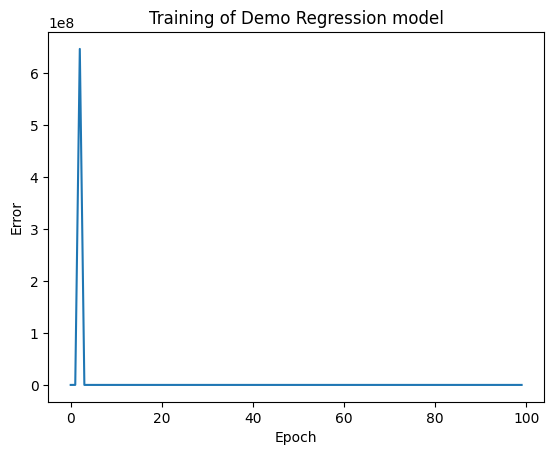

In [ ]:
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

Here we can see that the accuracy is quite low and so tuning is required. The loss is bouncing which could mean the learning rate is too high, and along with that, I can try changing the number of epochs.

In [ ]:
for learning_rate in [0.05, 0.05, 0.005, 0.0005, 0.00005]:

  #Subsection 500 of the x train and x test dataset
  # Dont need one hot for y
  X = X_train[:500]
  Y = y_train[:500]


  X = torch.tensor(X, dtype=torch.float32)
  Y = torch.tensor(Y, dtype=torch.long)

  model = bmodel(3072, 100, 10)

  optimizer = SGD(model.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()

  previous_total_loss = 0
  error_traj = []
  for epoch in range(100):

      total_loss = 0

      # going through my inputs
      for iteration in range(len(X)):

          input_i = X[iteration]  # xi
          label_i = Y[iteration][0]  # yi

          # 1 - forward pass
          output_i = model.forward(input_i) ## calculate the neural network output for one input

          # 2 - compute loss
          loss = criterion(output_i.squeeze(), label_i)

          # 3 - backprop
          loss.backward() # calculates the gradient for a single value and adds it to the previous one

          total_loss += float(loss.item()) # add the total loss for this epoch.

      # early stopping
      if (total_loss < 0.5):
    #      print("Epoch #" + str(epoch))
          break

      optimizer.step() # update the parameters
      optimizer.zero_grad() # zero out the previous gradient


     # print("Total loss: " + str(total_loss))
      error_traj.append(total_loss)
      if (epoch == 99):
        print("Learning rate: " + str(learning_rate))
        print("Total loss: " + str(total_loss))

Learning rate: 0.05
Total loss: 1289.7857735157013


KeyboardInterrupt: 

In [ ]:
# Now i will try 1000 epochs
learning_rate = 0.00005

#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
X = X_train[:500]
Y = y_train[:500]


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel(3072, 100, 10)

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(1000):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 0.5):
  #      print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


  # print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)
    if (epoch == 999):
      print("Learning rate: " + str(learning_rate))
      print("Total loss: " + str(total_loss))

From this I learned that the ideal learning rate was 5e^-5 and that we should have 1000 epochs

In [ ]:
print(y_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = predict_tf(model, X_val_ts)

#flatten from tensor to numpy array
X_val_pred = X_val_pred.numpy()
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

In [ ]:
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

In [ ]:
# Now I will save this model to a .pt file and then reload it
torch.save(model.state_dict(), "bmodel_cifar10.pt")

In [ ]:
# Recreate the model (with same input/hidden/output sizes)
model2 = bmodel(input_size=3072, hidden_size=100, output_size=10)
# Load again
model2.load_state_dict(torch.load("bmodel_cifar10.pt"))


Now we will evaluate it again to make sure the loaded model2 is the same as the og model

In [ ]:
print(y_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = predict_tf(model2, X_val_ts)

#flatten from tensor to numpy array
X_val_pred = X_val_pred.numpy()
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

The accuracy of both is 0.292, meaning they are the same model.

###Now I will generate a custom deep model.

In [ ]:
class bmodel_custom(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(bmodel_custom, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer
        self.relu = nn.ReLU()                          # Activation
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return x

In [ ]:
# Now i will try 1000 epochs
learning_rate = 0.00005

#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
X = X_train[:500]
Y = y_train[:500]


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel_custom(3072, 100, 10)

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(1000):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 0.5):
  #      print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


  # print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)
    if (epoch == 999):
      print("Learning rate: " + str(learning_rate))
      print("Total loss: " + str(total_loss))

I changed the model and made it more complex by having it be a 5 layer deep NN instead of a 2 layer.

In [ ]:
print(y_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = predict_tf(model, X_val_ts)

#flatten from tensor to numpy array
X_val_pred = X_val_pred.numpy()
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

In [ ]:
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

Test the test accuracy too

In [ ]:

# Turn validation set to tensors
X_test_ts = torch.tensor(X_test, dtype=torch.float32)
X_test_pred = predict_tf(model, X_test_ts)

#flatten from tensor to numpy array
X_test_pred = X_test_pred.numpy()
#print(X_val_pred)
print(X_test_pred.shape)

#Turn from (1000,) to (1000,1)
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0], 1)
print(X_test_pred.shape)


test_acc = 0

# Calculate mean correct manually
for i in range(len(X_test_pred)):
  if X_test_pred[i] == y_test[i]:
    test_acc += 1

test_acc = test_acc / len(X_test_pred)
print(test_acc)

The model with the deeper neural network performed only slightly better than the 2 layer. So I will now implement a convolutional neural network.

#Week 11 HW Assignment

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from torch.optim import SGD

My model has 2 convolution/pooling layers that are fed into a deep network of 3 hidden layers of size 128 (so 4 layers total).

In [3]:
class bmodel_cnn(nn.Module):
    def __init__(self):
        super(bmodel_cnn, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: [64, 16, 16]
        self.pool2 = nn.MaxPool2d(2, 2)                          # Output: [64, 8, 8]

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128,128)
        self.fc3 = nn.Linear(128,128)
        self.fc4 = nn.Linear(128, 10)  # CIFAR-10 has 10 classes

        self.relu = nn.ReLU()                          # Activation





    def forward(self, x):
        x = self.relu(self.conv1(x))     # [B, 32, 32, 32]
        x = self.pool1(x)             # [B, 32, 16, 16]
        x = self.relu(self.conv2(x))     # [B, 64, 16, 16]
        x = self.pool2(x)             # [B, 64, 8, 8]
        x = x.view(x.size(0), -1)     # Flatten: [B, 64*8*8]
        x = self.relu(self.fc1(x))       # [B, 128]
        x = self.relu(self.fc2(x))       # [128 128]
        x = self.relu(self.fc3(x))       # [128, 128]
        x = self.fc4(x)               # [B, 10]
        return x

In [5]:
from tensorflow.keras.datasets import cifar10
def load_cifar10():
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  print(trainset.shape())

In [6]:
# Loads CIFAR-10 and splits into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
learning_rate = 0.00001

#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
# And now we need 32x32x3 image no need to flatten
X = X_train[:500]
Y = y_train[:500]


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel_cnn()

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(1000):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        input_i = input_i.permute(2, 0, 1).unsqueeze(0)  # (1, 3, 32, 32)

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 0.5):
  #      print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


  # print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)
    print("Learning rate: " + str(learning_rate))
    print("Total loss: " + str(total_loss))

Learning rate: 1e-05
Total loss: 1611.7543207108974
Learning rate: 1e-05
Total loss: 1888.6762987971306
Learning rate: 1e-05
Total loss: 1281.7294442653656
Learning rate: 1e-05
Total loss: 1192.353389441967
Learning rate: 1e-05
Total loss: 1158.5314090251923
Learning rate: 1e-05
Total loss: 1130.6048566102982
Learning rate: 1e-05
Total loss: 1120.522289276123
Learning rate: 1e-05
Total loss: 1113.6937025785446
Learning rate: 1e-05
Total loss: 1106.841231226921
Learning rate: 1e-05
Total loss: 1100.2283294200897
Learning rate: 1e-05
Total loss: 1093.5757563114166
Learning rate: 1e-05
Total loss: 1087.3850450515747
Learning rate: 1e-05
Total loss: 1082.1805099248886
Learning rate: 1e-05
Total loss: 1082.097594499588
Learning rate: 1e-05
Total loss: 1087.2863431572914
Learning rate: 1e-05
Total loss: 1116.0656940937042
Learning rate: 1e-05
Total loss: 1090.7606654167175
Learning rate: 1e-05
Total loss: 1100.4098471403122
Learning rate: 1e-05
Total loss: 1096.2081445455551
Learning rate: 1

Even with only 100 epochs, the loss was significantly lower (786.46). However, I then added more epochs, for a total of 1000. With that the loss was less than 5.

In [9]:
num_validation=1000
num_test=1000
num_training = 500


mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [2]:
import torch
import torch.nn.functional as F

def predict_tf(model, X):
    """
    Predict class labels for input tensor X using the trained model.

    Args:
        model: Trained PyTorch model.
        X (Tensor): Input tensor, shape (N, 3, 32, 32) for batch or (3, 32, 32) for single image.

    Returns:
        Tensor: Predicted class indices.
    """
    model.eval()  # set to evaluation mode
    with torch.no_grad():
        outputs = model(X)
        predictions = torch.argmax(outputs, dim=1)
    return predictions


In [11]:
print(X_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = []

print(X_val_ts[0].shape)

for i in range(len(X_val_ts)):
  input_i = X_val_ts[i].permute(2, 0, 1).unsqueeze(0)
  X_val_pred.append(predict_tf(model, input_i))

#flatten from tensor to numpy array
X_val_pred = np.array(X_val_pred)
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

(1000, 32, 32, 3)
torch.Size([32, 32, 3])
(1000, 1)
(1000, 1)
0.391


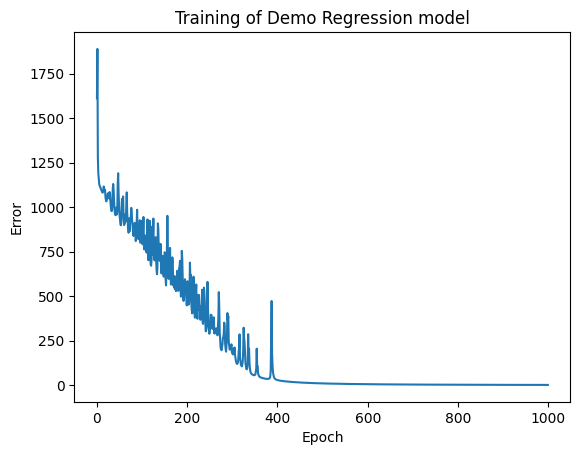

In [13]:
from matplotlib import pyplot as plt
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

In [15]:

# Turn validation set to tensors
X_test_ts = torch.tensor(X_test, dtype=torch.float32)
#X_test_pred = predict_tf(model, X_test_ts)

X_test_pred = []
print(X_test_ts[0].shape)

for i in range(len(X_test_ts)):
  input_i = X_test_ts[i].permute(2, 0, 1).unsqueeze(0)
  X_test_pred.append(predict_tf(model, input_i))



#flatten from tensor to numpy array
X_test_pred = np.array(X_test_pred)
#print(X_val_pred)
print(X_test_pred.shape)

#Turn from (1000,) to (1000,1)
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0], 1)
print(X_test_pred.shape)


test_acc = 0

# Calculate mean correct manually
for i in range(len(X_test_pred)):
  if X_test_pred[i] == y_test[i]:
    test_acc += 1

#Print a few expected vs actual values
for i in range(10):
  print("Expected: " + str(y_test[i]) + " Actual: " + str(X_test_pred[i]))

test_acc = test_acc / len(X_test_pred)
print("Accuracy" + str(test_acc))

torch.Size([32, 32, 3])
(1000, 1)
(1000, 1)
Expected: [3] Actual: [5]
Expected: [8] Actual: [8]
Expected: [8] Actual: [0]
Expected: [0] Actual: [0]
Expected: [6] Actual: [4]
Expected: [6] Actual: [3]
Expected: [1] Actual: [3]
Expected: [6] Actual: [2]
Expected: [3] Actual: [3]
Expected: [1] Actual: [1]
Accuracy0.368


This time I used a convolutional neural network which gave slitghtly better performance but better than the deep neural non convolutional network. The accuracy of the test was 0.368 from 0.292 on the validation set, so around 30% better. More tuning and things will probably make it more accurate.

##Part 2 More Complex CNN

This will be a more complex CNN with 4 layers of convlution/pooling and a 4 hidden layer deep NN (so 5 layers total for the DNN). I will also give it a larger train set of images to train on.

In [26]:
class bmodel_cnn_2(nn.Module):
    def __init__(self):
        super(bmodel_cnn_2, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: [64, 16, 16]
        self.pool2 = nn.MaxPool2d(2, 2)                          # Output: [64, 8, 8]

        # Conv Layer 3: [64, 8, 8] -> [128, 8, 8] -> [128, 4, 4]
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Conv Layer 4: [128, 4, 4] -> [256, 4, 4] -> [256, 2, 2]
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(256*2*2, 128)
        self.fc2 = nn.Linear(128,128)
        self.fc3 = nn.Linear(128,128)
        self.fc4 = nn.Linear(128,128)
        self.fc5 = nn.Linear(128, 10)  # CIFAR-10 has 10 classes

        self.relu = nn.ReLU()                          # Activation





    def forward(self, x):
        x = self.relu(self.conv1(x))     # [B, 32, 32, 32]
        x = self.pool1(x)             # [B, 32, 16, 16]
        x = self.relu(self.conv2(x))     # [B, 64, 16, 16]
        x = self.pool2(x)             # [B, 64, 8, 8]
        x = self.relu(self.conv3(x))     # [B, 64, 16, 16]
        x = self.pool3(x)             # [B, 64, 8, 8]
        x = self.relu(self.conv4(x))     # [B, 64, 16, 16]
        x = self.pool4(x)             # [B, 64, 8, 8]
        x = x.view(x.size(0), -1)     # Flatten: [B, 64*8*8]
        x = self.relu(self.fc1(x))       # [B, 128]
        x = self.relu(self.fc2(x))       # [128 128]
        x = self.relu(self.fc3(x))       # [128, 128]
        x = self.fc4(x)               # [B, 10]
        return x

In [21]:
from tensorflow.keras.datasets import cifar10
def load_cifar10():
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  print(trainset.shape())

In [22]:
# Loads CIFAR-10 and splits into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


I will reduce the epochs however otherwise it will take way too long.

In [49]:
learning_rate = 0.00001

#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
# And now we need 32x32x3 image no need to flatten
X = X_train[:2000]
Y = y_train[:2000]


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel_cnn_2()

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(200):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        input_i = input_i.permute(2, 0, 1).unsqueeze(0)  # (1, 3, 32, 32)

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 10):
  #      print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


  # print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)
    print("Learning rate: " + str(learning_rate))
    print("Total loss: " + str(total_loss))

Learning rate: 1e-05
Total loss: 9898.37130355835
Learning rate: 1e-05
Total loss: 8808.133739471436
Learning rate: 1e-05
Total loss: 7615.856451392174
Learning rate: 1e-05
Total loss: 6160.213180303574
Learning rate: 1e-05
Total loss: 6745.699265301228
Learning rate: 1e-05
Total loss: 8036.704271554947
Learning rate: 1e-05
Total loss: 7178.593120276928
Learning rate: 1e-05
Total loss: 8629.529654979706
Learning rate: 1e-05
Total loss: 6934.881607294083
Learning rate: 1e-05
Total loss: 6932.3290029764175
Learning rate: 1e-05
Total loss: 8161.20009303093
Learning rate: 1e-05
Total loss: 6375.109387636185
Learning rate: 1e-05
Total loss: 5763.64269888401
Learning rate: 1e-05
Total loss: 5526.186134338379
Learning rate: 1e-05
Total loss: 5130.045751214027
Learning rate: 1e-05
Total loss: 5243.857130050659
Learning rate: 1e-05
Total loss: 5237.890818953514
Learning rate: 1e-05
Total loss: 4964.864161729813
Learning rate: 1e-05
Total loss: 4687.997071027756
Learning rate: 1e-05
Total loss: 

I ran the above a few times and realized that the larger set took way too long so I reduced the set again (but still larger than before).

In [50]:
num_validation=1000
num_test=1000
num_training = 500


mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [51]:
import torch
import torch.nn.functional as F

def predict_tf(model, X):
    """
    Predict class labels for input tensor X using the trained model.

    Args:
        model: Trained PyTorch model.
        X (Tensor): Input tensor, shape (N, 3, 32, 32) for batch or (3, 32, 32) for single image.

    Returns:
        Tensor: Predicted class indices.
    """
    model.eval()  # set to evaluation mode
    with torch.no_grad():
        outputs = model(X)
        predictions = torch.argmax(outputs, dim=1)
    return predictions


In [52]:
print(X_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = []

print(X_val_ts[0].shape)

for i in range(len(X_val_ts)):
  input_i = X_val_ts[i].permute(2, 0, 1).unsqueeze(0)
  X_val_pred.append(predict_tf(model, input_i))

#flatten from tensor to numpy array
X_val_pred = np.array(X_val_pred)
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

(1000, 32, 32, 3)
torch.Size([32, 32, 3])
(1000, 1)
(1000, 1)
0.252


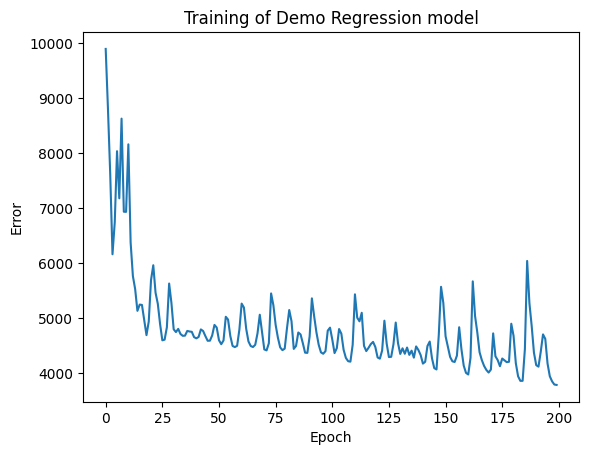

In [53]:
from matplotlib import pyplot as plt
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

In [54]:

# Turn validation set to tensors
X_test_ts = torch.tensor(X_test, dtype=torch.float32)
#X_test_pred = predict_tf(model, X_test_ts)

X_test_pred = []
print(X_test_ts[0].shape)

for i in range(len(X_test_ts)):
  input_i = X_test_ts[i].permute(2, 0, 1).unsqueeze(0)
  X_test_pred.append(predict_tf(model, input_i))



#flatten from tensor to numpy array
X_test_pred = np.array(X_test_pred)
#print(X_val_pred)
print(X_test_pred.shape)

#Turn from (1000,) to (1000,1)
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0], 1)
print(X_test_pred.shape)


test_acc = 0

# Calculate mean correct manually
for i in range(len(X_test_pred)):
  if X_test_pred[i] == y_test[i]:
    test_acc += 1

#Print a few expected vs actual values
for i in range(10):
  print("Expected: " + str(y_test[i]) + " Actual: " + str(X_test_pred[i]))

test_acc = test_acc / len(X_test_pred)
print("Accuracy" + str(test_acc))

torch.Size([32, 32, 3])
(1000, 1)
(1000, 1)
Expected: [3] Actual: [5]
Expected: [8] Actual: [1]
Expected: [8] Actual: [1]
Expected: [0] Actual: [1]
Expected: [6] Actual: [4]
Expected: [6] Actual: [6]
Expected: [1] Actual: [5]
Expected: [6] Actual: [4]
Expected: [3] Actual: [5]
Expected: [1] Actual: [1]
Accuracy0.216


The accuracy is less but still more efficient as the one with the higher accuracy took way too long because of 1000 epochs. I will try to make it less complicated and acheive a better result next.

In [55]:
print("En")

En


I will now only have the 3 conv layers and 2 hidden layers in the DNN.

In [12]:
class bmodel_cnn_3(nn.Module):
    def __init__(self):
        super(bmodel_cnn_3, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: [64, 16, 16]
        self.pool2 = nn.MaxPool2d(2, 2)                          # Output: [64, 8, 8]

        # Conv Layer 3: [64, 8, 8] -> [128, 8, 8] -> [128, 4, 4]
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128*4*4, 128)
        self.fc4 = nn.Linear(128,128)
        self.fc5 = nn.Linear(128, 10)  # CIFAR-10 has 10 classes

        self.relu = nn.ReLU()                          # Activation





    def forward(self, x):
        x = self.relu(self.conv1(x))     # [B, 32, 32, 32]
        x = self.pool1(x)             # [B, 32, 16, 16]
        x = self.relu(self.conv2(x))     # [B, 64, 16, 16]
        x = self.pool2(x)             # [B, 64, 8, 8]
        x = self.relu(self.conv4(x))     # [B, 64, 16, 16]
        x = self.pool4(x)             # [B, 64, 8, 8]
        x = x.view(x.size(0), -1)     # Flatten: [B, 64*8*8]
        x = self.relu(self.fc1(x))       # [B, 128]
        x = self.relu(self.fc4(x))       # [128, 128]
        x = self.fc5(x)               # [B, 10]
        return x

In [5]:
from tensorflow.keras.datasets import cifar10
def load_cifar10():
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  print(trainset.shape())

In [6]:
# Loads CIFAR-10 and splits into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [29]:
learning_rate = 0.000005

#Subsection 500 of the x train and x test dataset
# Dont need one hot for y
# And now we need 32x32x3 image no need to flatten
X = X_train[:2000]
Y = y_train[:2000]


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

model = bmodel_cnn_3()

optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

previous_total_loss = 0
error_traj = []
for epoch in range(400):

    total_loss = 0

    # going through my inputs
    for iteration in range(len(X)):

        input_i = X[iteration]  # xi
        label_i = Y[iteration][0]  # yi

        input_i = input_i.permute(2, 0, 1).unsqueeze(0)  # (1, 3, 32, 32)

        # 1 - forward pass
        output_i = model.forward(input_i) ## calculate the neural network output for one input

        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one

        total_loss += float(loss.item()) # add the total loss for this epoch.

    # early stopping
    if (total_loss < 10):
  #      print("Epoch #" + str(epoch))
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient


  # print("Total loss: " + str(total_loss))
    error_traj.append(total_loss)
    print("Learning rate: " + str(learning_rate))
    print("Total loss: " + str(total_loss))

Learning rate: 5e-06
Total loss: 5313.959860384464
Learning rate: 5e-06
Total loss: 5601.5031843185425
Learning rate: 5e-06
Total loss: 5264.167945623398
Learning rate: 5e-06
Total loss: 4656.090083479881
Learning rate: 5e-06
Total loss: 4576.84053170681
Learning rate: 5e-06
Total loss: 4541.020627140999
Learning rate: 5e-06
Total loss: 4507.746451020241
Learning rate: 5e-06
Total loss: 4474.857969880104
Learning rate: 5e-06
Total loss: 4443.232517242432
Learning rate: 5e-06
Total loss: 4409.706384062767
Learning rate: 5e-06
Total loss: 4379.837898850441
Learning rate: 5e-06
Total loss: 4376.478128552437
Learning rate: 5e-06
Total loss: 4536.5389523506165
Learning rate: 5e-06
Total loss: 4667.935199022293
Learning rate: 5e-06
Total loss: 4544.652746081352
Learning rate: 5e-06
Total loss: 4458.907562494278
Learning rate: 5e-06
Total loss: 4404.095616817474
Learning rate: 5e-06
Total loss: 4357.1449419260025
Learning rate: 5e-06
Total loss: 4307.418937206268
Learning rate: 5e-06
Total lo

In [30]:
num_validation=1000
num_test=1000
num_training = 500


mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [31]:
import torch
import torch.nn.functional as F

def predict_tf(model, X):
    """
    Predict class labels for input tensor X using the trained model.

    Args:
        model: Trained PyTorch model.
        X (Tensor): Input tensor, shape (N, 3, 32, 32) for batch or (3, 32, 32) for single image.

    Returns:
        Tensor: Predicted class indices.
    """
    model.eval()  # set to evaluation mode
    with torch.no_grad():
        outputs = model(X)
        predictions = torch.argmax(outputs, dim=1)
    return predictions


In [32]:
print(X_val.shape)


# Turn validation set to tensors
X_val_ts = torch.tensor(X_val, dtype=torch.float32)
X_val_pred = []

print(X_val_ts[0].shape)

for i in range(len(X_val_ts)):
  input_i = X_val_ts[i].permute(2, 0, 1).unsqueeze(0)
  X_val_pred.append(predict_tf(model, input_i))

#flatten from tensor to numpy array
X_val_pred = np.array(X_val_pred)
#print(X_val_pred)
print(X_val_pred.shape)

#Turn from (1000,) to (1000,1)
X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], 1)
print(X_val_pred.shape)


val_acc = 0

# Calculate mean correct manually
for i in range(len(X_val_pred)):
  if X_val_pred[i] == y_val[i]:
    val_acc += 1

val_acc = val_acc / len(X_val_pred)
print(val_acc)

(1000, 32, 32, 3)
torch.Size([32, 32, 3])
(1000, 1)
(1000, 1)
0.772


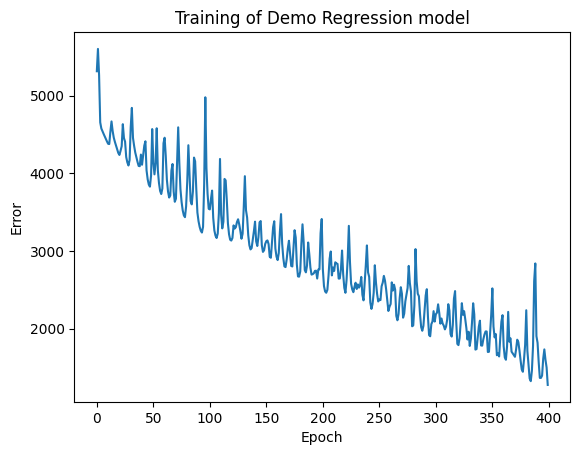

In [36]:
from matplotlib import pyplot as plt
# Plot error_traj with epoch
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

We can see that here the validation accuracy is now very high with a score of higher than 77.2%. This is a much better result.

In [37]:
print("echo")

echo
